In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [62]:
data=pd.read_csv('/subscription.csv')

In [63]:
data.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   user_id                    500000 non-null  int64 
 1   subscription_signup_date   500000 non-null  object
 2   subscription_monthly_cost  500000 non-null  int64 
 3   country                    500000 non-null  object
 4   source                     500000 non-null  object
 5   billing_cycles             500000 non-null  int64 
 6   is_active                  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


## Question 1 

In [65]:
def retention(df):
    retention_rate=[]
    for i in range(1,9):
        retention_rate.append(len(df[df['billing_cycles']>=i])/len(df))
    return pd.Series(retention_rate,index=range(1,9))

In [66]:
grouping=data.groupby('subscription_monthly_cost').apply(retention)
grouping

,1,2,3,4,5,6,7,8
subscription_monthly_cost,,,,,,,,
29,1.0,0.607542,0.458473,0.376232,0.323028,0.285416,0.257157,0.235901
49,1.0,0.383666,0.206247,0.134043,0.096466,0.074072,0.059408,0.048845
99,1.0,0.158769,0.070040,0.042411,0.029676,0.022182,0.017937,0.015007


In [67]:
grouping.T

subscription_monthly_cost,29,49,99
1,1.000000,1.000000,1.000000
2,0.607542,0.383666,0.158769
3,0.458473,0.206247,0.070040
4,0.376232,0.134043,0.042411
5,0.323028,0.096466,0.029676
6,0.285416,0.074072,0.022182
7,0.257157,0.059408,0.017937
8,0.235901,0.048845,0.015007


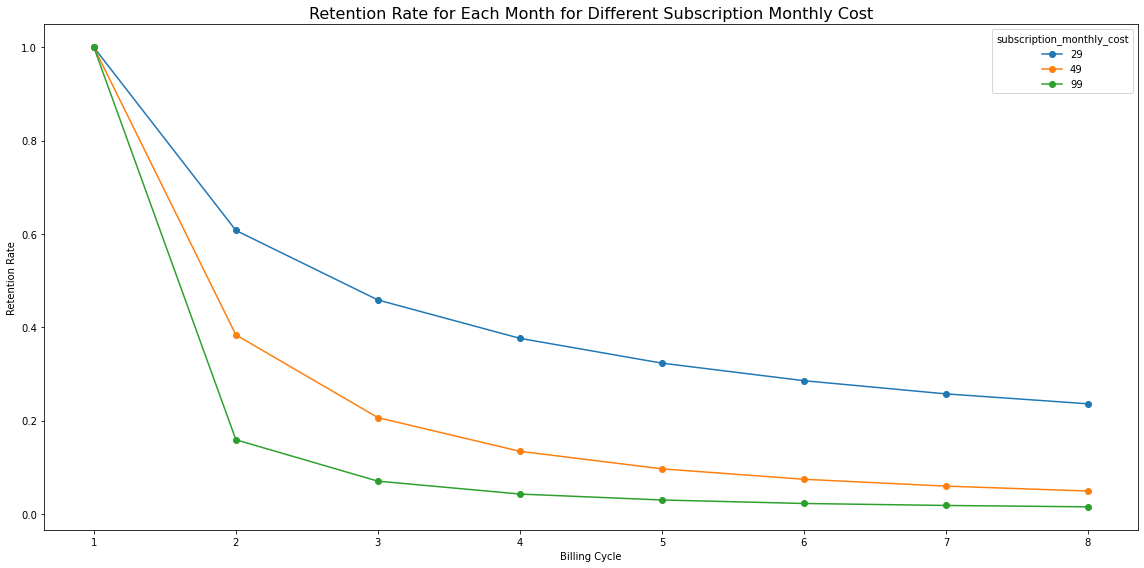

In [68]:
fig,ax=plt.subplots(figsize=(16,8))
grouping.T.plot(ax=ax,marker='o')
ax.set_title('Retention Rate for Each Month for Different Subscription Monthly Cost',fontsize=16)
ax.set_xlabel('Billing Cycle')
ax.set_ylabel('Retention Rate')
plt.tight_layout()
plt.show()

## Question 2 

#### Influence of country

In [69]:
grouping_country=data.groupby('country').apply(retention)
grouping_country

,1,2,3,4,5,6,7,8
country,,,,,,,,
China,1.0,0.514831,0.402777,0.360426,0.336274,0.319856,0.307084,0.295453
France,1.0,0.334946,0.177732,0.119004,0.088479,0.069935,0.058341,0.049688
Germany,1.0,0.451284,0.278411,0.195910,0.146474,0.115151,0.093868,0.078465
India,1.0,0.446728,0.326962,0.284527,0.261603,0.246736,0.234847,0.225769
Italy,1.0,0.341684,0.179502,0.119914,0.090015,0.071135,0.057523,0.048695
Spain,1.0,0.339098,0.178985,0.119879,0.088648,0.070065,0.057617,0.048503
UK,1.0,0.458938,0.285133,0.198067,0.149421,0.117356,0.095735,0.079494
US,1.0,0.456509,0.284255,0.198853,0.149284,0.117398,0.094875,0.078981


Text(0, 0.5, 'Retention Rate')

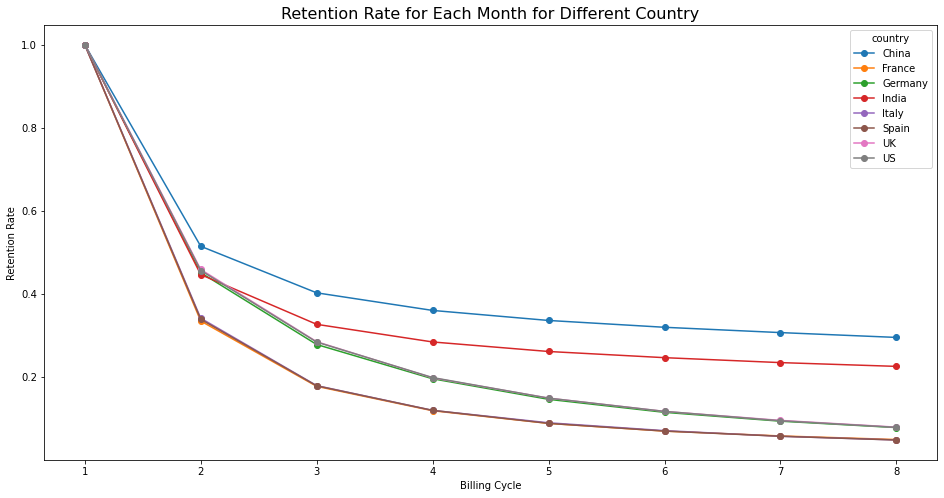

In [70]:
fig,ax=plt.subplots(figsize=(16,8))
grouping_country.T.plot(ax=ax,marker='o')
ax.set_title('Retention Rate for Each Month for Different Country',fontsize=16)
ax.set_xlabel('Billing Cycle')
ax.set_ylabel('Retention Rate')

#### Influence of source

In [71]:
grouping_source=data.groupby('source').apply(retention)
grouping_source

,1,2,3,4,5,6,7,8
source,,,,,,,,
ads,1.0,0.388873,0.222094,0.152607,0.114959,0.092043,0.076756,0.066237
friend_referral,1.0,0.699443,0.617038,0.561282,0.519854,0.487596,0.461110,0.436507
seo,1.0,0.562395,0.420012,0.337594,0.286254,0.247877,0.218680,0.194475


Text(0, 0.5, 'Retention Rate')

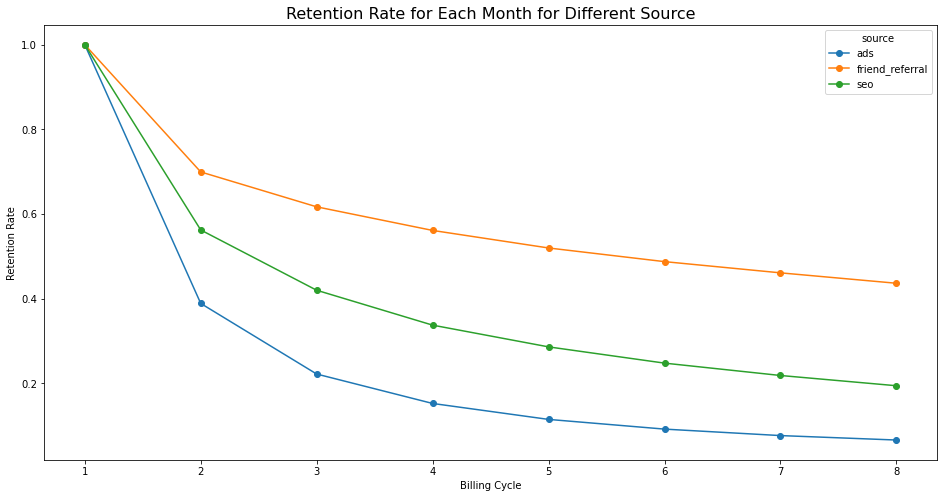

In [72]:
fig,ax=plt.subplots(figsize=(16,8))
grouping_source.T.plot(ax=ax,marker='o')
ax.set_title('Retention Rate for Each Month for Different Source',fontsize=16)
ax.set_xlabel('Billing Cycle')
ax.set_ylabel('Retention Rate')